In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

props_path = "/content/nbt7bt_ml_dataset.csv"
df = pd.read_csv(props_path)

df.head()

,Na2CO3,105.988438,Unnamed:_2,Na,22.989769,Unnamed:_5,Na.1,0.5
0,Bi2O3,465.959000,NaN,Bi,208.9804,NaN,Bi,0.5
1,TiO2,79.865800,NaN,Ti,47.8670,NaN,NaN,NaN
2,BaCO3,197.335900,NaN,O,15.9994,NaN,NaN,NaN
3,NBT 7BT,213.344219,NaN,C,12.0107,NaN,NaN,NaN
4,NaN,NaN,NaN,Ba,137.3270,NaN,NaN,NaN


In [ ]:
props_path = "/content/nbt7bt_properties.csv"
df = pd.read_csv(props_path)

df.head()


,Na_x,Bi_x,Ba,sinter_temp,density,d33,epsilon_r,Ec,grain_size
0,-0.04,0.04,0.07,1125,5.579,157.8,1648.0,2.687,2.117
1,-0.04,0.04,0.07,1150,5.881,165.5,1702.0,2.139,2.797
2,-0.04,0.04,0.07,1175,5.572,159.5,1684.0,2.696,2.238
3,-0.03,0.03,0.07,1125,5.566,154.6,1676.0,2.649,2.253
4,-0.03,0.03,0.07,1150,5.900,169.1,1686.0,2.097,2.859


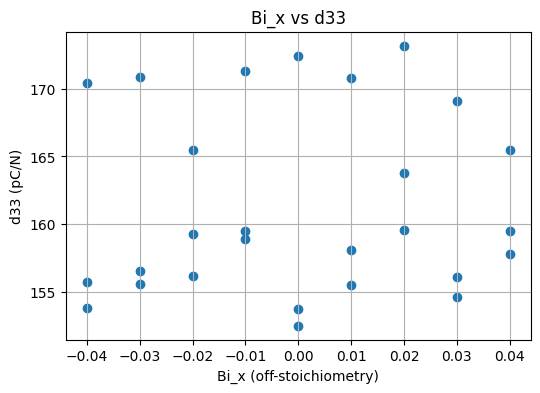

In [ ]:
# 1) Na_x vs d33
plt.figure(figsize=(6, 4))
plt.scatter(df["Bi_x"], df["d33"])
plt.xlabel("Bi_x (off-stoichiometry)")
plt.ylabel("d33 (pC/N)")
plt.title("Bi_x vs d33")
plt.grid(True)
plt.show()


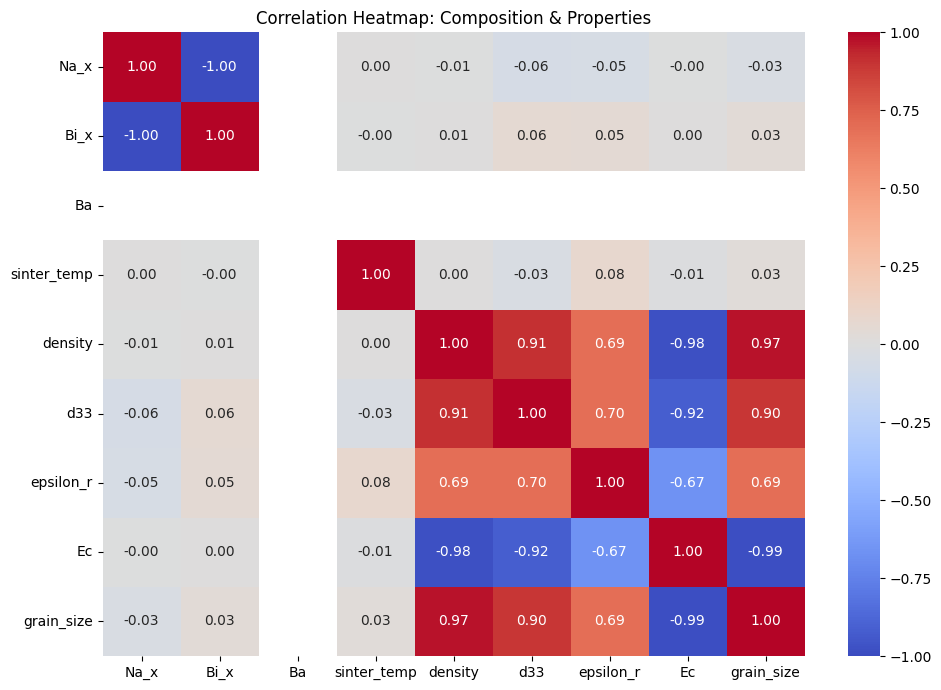

In [ ]:

plt.figure(figsize=(10, 7))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Composition & Properties")
plt.tight_layout()
plt.show()


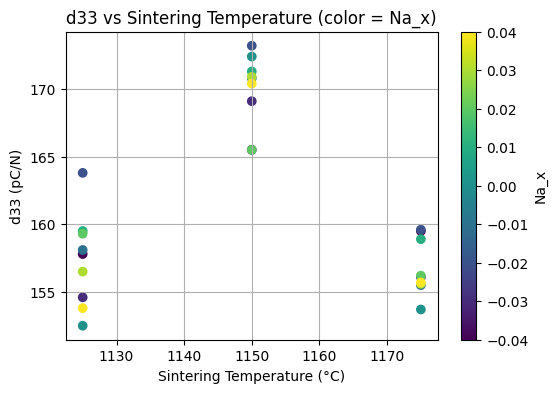

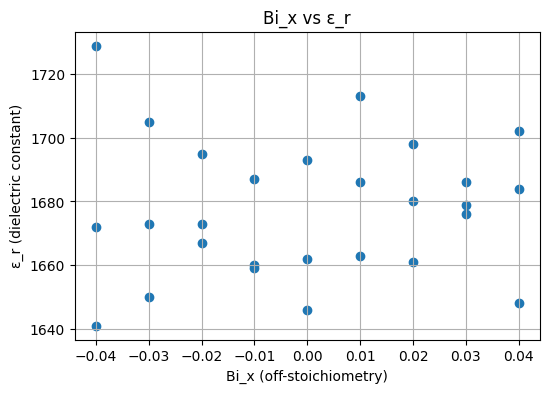

In [ ]:
# 2) Sintering temperature vs d33, color by Na_x
plt.figure(figsize=(6, 4))
sc = plt.scatter(df["sinter_temp"], df["d33"], c=df["Na_x"], cmap="viridis")
plt.xlabel("Sintering Temperature (°C)")
plt.ylabel("d33 (pC/N)")
plt.title("d33 vs Sintering Temperature (color = Na_x)")
plt.colorbar(sc, label="Na_x")
plt.grid(True)
plt.show()

# 4) Na_x vs dielectric constant (epsilon_r)
plt.figure(figsize=(6, 4))
plt.scatter(df["Bi_x"], df["epsilon_r"])
plt.xlabel("Bi_x (off-stoichiometry)")
plt.ylabel("ε_r (dielectric constant)")
plt.title("Bi_x vs ε_r")
plt.grid(True)
plt.show()


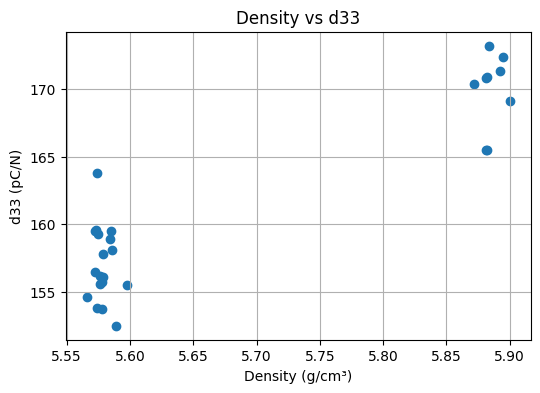

In [ ]:
# 3) Density vs d33
plt.figure(figsize=(6, 4))
plt.scatter(df["density"], df["d33"])
plt.xlabel("Density (g/cm³)")
plt.ylabel("d33 (pC/N)")
plt.title("Density vs d33")
plt.grid(True)
plt.show()


In [ ]:
# features & targets

feature_cols = ["Na_x", "Bi_x", "Ba", "sinter_temp", "density"]
target_cols  = ["d33", "epsilon_r", "Ec", "grain_size"]

X = df[feature_cols].values
y = df[target_cols].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, y_train.shape


((21, 5), (21, 4))

In [ ]:
# train RandomForestRegressor (multi-output)
base_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model_rf = MultiOutputRegressor(base_rf)
model_rf.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42))

In [ ]:
# evaluation
y_pred = model_rf.predict(X_test)

r2  = r2_score(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

for i, target in enumerate(target_cols):
    print(f"{target}: R2 = {r2[i]:.3f}, MAE = {mae[i]:.3f}")


d33: R2 = 0.989, MAE = 0.409
epsilon_r: R2 = 0.139, MAE = 13.213
Ec: R2 = 0.970, MAE = 0.033
grain_size: R2 = 0.924, MAE = 0.056


In [ ]:
n_show = 5  # how many rows to show
idx = np.random.choice(len(X_test), size=n_show, replace=False)

X_sample = X_test[idx]
y_true_sample = y_test[idx]
y_pred_sample = model_rf.predict(X_sample)

df_compare = pd.DataFrame(X_sample, columns=feature_cols)

for i, t in enumerate(target_cols):
    df_compare[f"true_{t}"] = y_true_sample[:, i]
    df_compare[f"pred_{t}"] = y_pred_sample[:, i]

df_compare.round(3)

,Na_x,Bi_x,Ba,sinter_temp,density,true_d33,pred_d33,true_epsilon_r,pred_epsilon_r,true_Ec,pred_Ec,true_grain_size,pred_grain_size
0,-0.01,0.01,0.07,1175.0,5.598,155.5,155.072,1663.0,1660.397,2.492,2.541,2.383,2.384
1,0.00,-0.00,0.07,1150.0,5.895,172.4,171.097,1693.0,1688.387,2.043,2.025,2.990,2.913
2,0.03,-0.03,0.07,1125.0,5.572,156.5,156.644,1650.0,1669.567,2.647,2.660,2.169,2.243
3,-0.04,0.04,0.07,1125.0,5.579,157.8,157.912,1648.0,1670.827,2.687,2.623,2.117,2.277
4,-0.01,0.01,0.07,1125.0,5.586,158.1,157.690,1686.0,1661.353,2.569,2.534,2.338,2.360


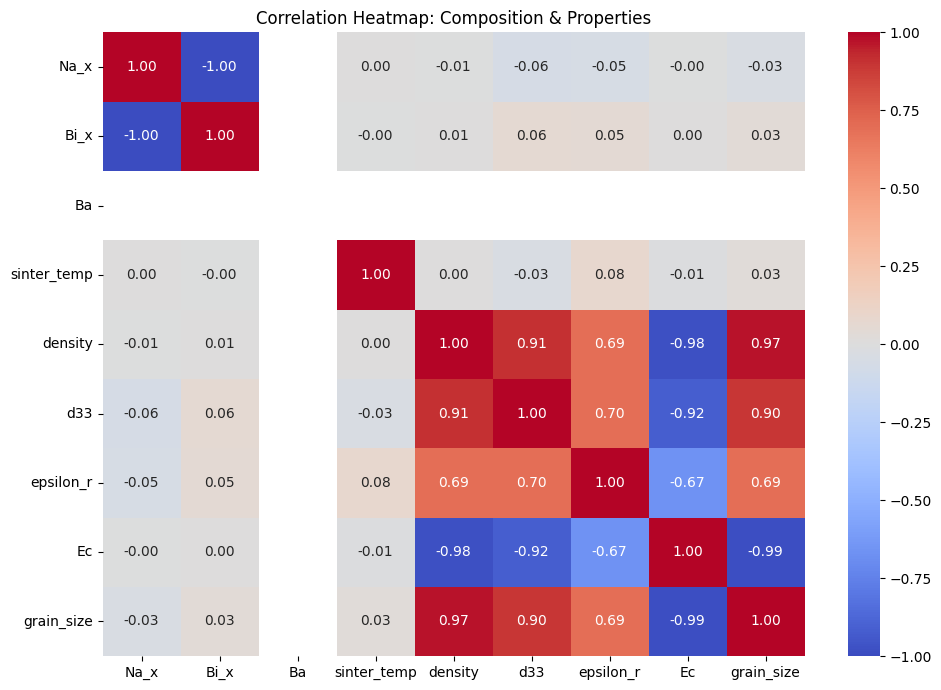

In [ ]:

plt.figure(figsize=(10, 7))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Composition & Properties")
plt.tight_layout()
plt.show()


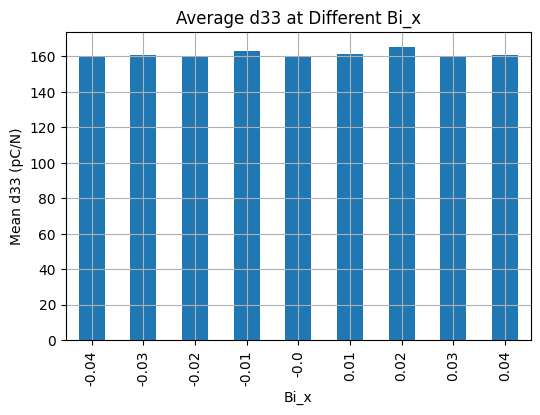

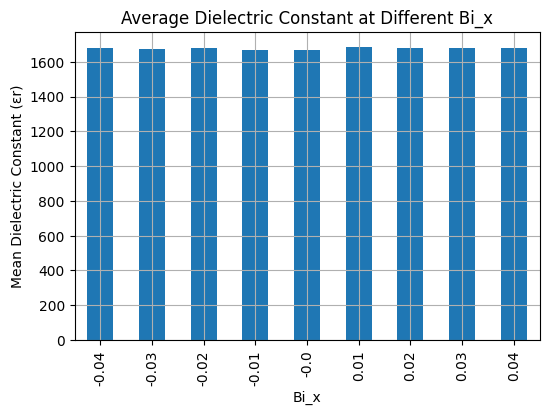

In [ ]:
mean_d33 = df.groupby("Bi_x")["d33"].mean()

plt.figure(figsize=(6, 4))
mean_d33.plot(kind="bar")
plt.xlabel("Bi_x")
plt.ylabel("Mean d33 (pC/N)")
plt.title("Average d33 at Different Bi_x")
plt.grid(True)
plt.show()

mean_eps = df.groupby("Bi_x")["epsilon_r"].mean()

plt.figure(figsize=(6, 4))
mean_eps.plot(kind="bar")
plt.xlabel("Bi_x")
plt.ylabel("Mean Dielectric Constant (εr)")
plt.title("Average Dielectric Constant at Different Bi_x")
plt.grid(True)
plt.show()



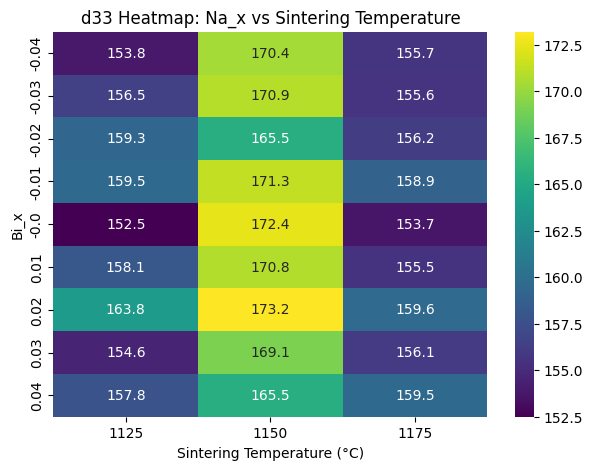

In [ ]:
pivot_d33 = df.pivot_table(
    values="d33",
    index="Bi_x",
    columns="sinter_temp",
    aggfunc="mean"
)

plt.figure(figsize=(7, 5))
sns.heatmap(pivot_d33, annot=True, fmt=".1f", cmap="viridis")
plt.title("d33 Heatmap: Na_x vs Sintering Temperature")
plt.xlabel("Sintering Temperature (°C)")
plt.ylabel("Bi_x")
plt.show()


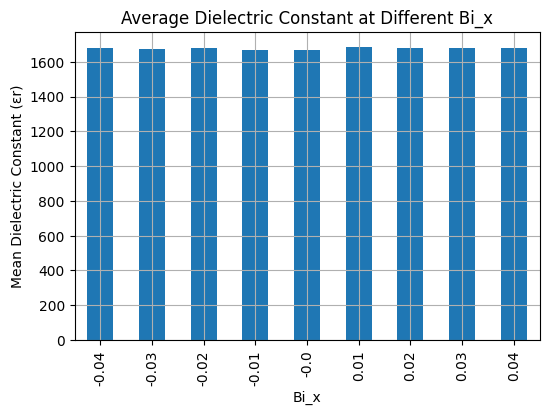

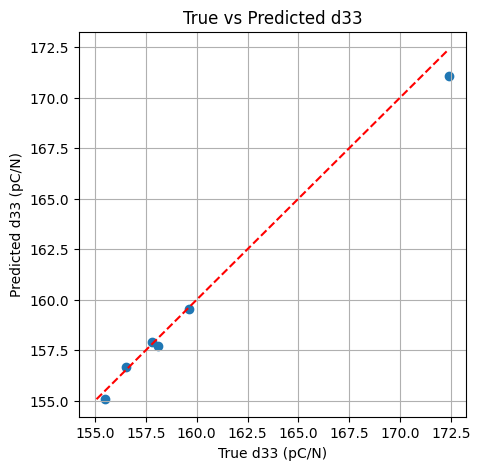

In [ ]:
mean_eps = df.groupby("Bi_x")["epsilon_r"].mean()

plt.figure(figsize=(6, 4))
mean_eps.plot(kind="bar")
plt.xlabel("Bi_x")
plt.ylabel("Mean Dielectric Constant (εr)")
plt.title("Average Dielectric Constant at Different Bi_x")
plt.grid(True)
plt.show()
# True vs predicted for d33
import numpy as np
import matplotlib.pyplot as plt

idx_d33 = target_cols.index("d33")

true_d33 = y_test[:, idx_d33]
pred_d33 = y_pred[:, idx_d33]

plt.figure(figsize=(5, 5))
plt.scatter(true_d33, pred_d33)
min_val = min(true_d33.min(), pred_d33.min())
max_val = max(true_d33.max(), pred_d33.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")  # y=x line
plt.xlabel("True d33 (pC/N)")
plt.ylabel("Predicted d33 (pC/N)")
plt.title("True vs Predicted d33")
plt.grid(True)
plt.show()


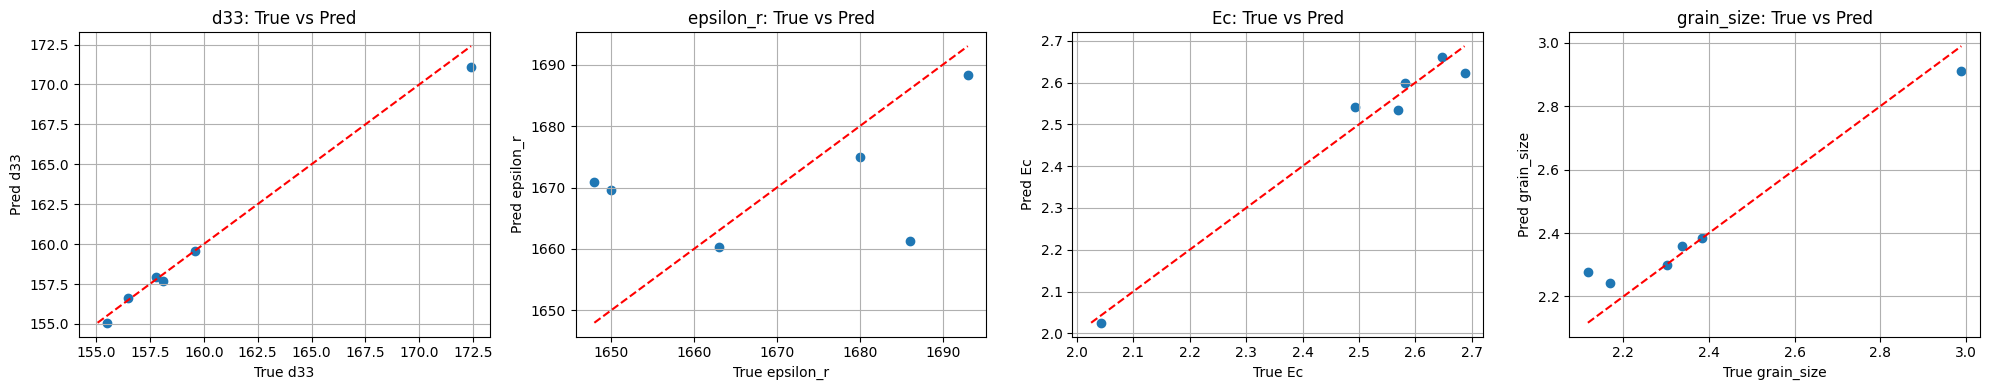

In [ ]:
# True vs predicted for all targets
import matplotlib.pyplot as plt

n_targets = len(target_cols)
plt.figure(figsize=(5 * n_targets, 4))

for i, t in enumerate(target_cols):
    true_vals = y_test[:, i]
    pred_vals = y_pred[:, i]

    plt.subplot(1, n_targets, i+1)
    plt.scatter(true_vals, pred_vals)
    min_val = min(true_vals.min(), pred_vals.min())
    max_val = max(true_vals.max(), pred_vals.max())
    plt.plot([min_val, max_val], [min_val, max_val], "r--")
    plt.xlabel(f"True {t}")
    plt.ylabel(f"Pred {t}")
    plt.title(f"{t}: True vs Pred")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# single prediction example
# Example composition

sample = np.array([[0.00, 0.00, 0.07, 1150, 5.85]])  # Na_x, Bi_x, Ba, temp, density varying input
predicted = model_rf.predict(sample)[0]

for t, v in zip(target_cols, predicted):
    print(f"Predicted {t}: {v:.3f}")


Predicted d33: 169.869
Predicted epsilon_r: 1705.547
Predicted Ec: 2.047
Predicted grain_size: 2.884
